In [5]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

In [6]:
X, y = make_classification(n_samples=50000, n_features=15, n_informative=10, n_redundant=5,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)
X.shape, y.shape
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)
X_train.shape, y_train.shape, X_test.shape, y_test.shape
from sklearn import linear_model
clf = linear_model.SGDClassifier(eta0=0.0001, alpha=0.0001, loss='log', random_state=15, penalty='l2', tol=1e-3, verbose=2, learning_rate='constant')
clf
clf.fit(X=X_train, y=y_train)
clf.coef_, clf.coef_.shape, clf.intercept_
# alpha : float
# Constant that multiplies the regularization term. 

# eta0 : double
# The initial learning rate for the ‘constant’, ‘invscaling’ or ‘adaptive’ schedules.

-- Epoch 1
Norm: 0.77, NNZs: 15, Bias: -0.316653, T: 37500, Avg. loss: 0.455552
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 0.91, NNZs: 15, Bias: -0.472747, T: 75000, Avg. loss: 0.394686
Total training time: 0.03 seconds.
-- Epoch 3
Norm: 0.98, NNZs: 15, Bias: -0.580082, T: 112500, Avg. loss: 0.385711
Total training time: 0.04 seconds.
-- Epoch 4
Norm: 1.02, NNZs: 15, Bias: -0.658292, T: 150000, Avg. loss: 0.382083
Total training time: 0.08 seconds.
-- Epoch 5
Norm: 1.04, NNZs: 15, Bias: -0.719528, T: 187500, Avg. loss: 0.380486
Total training time: 0.09 seconds.
-- Epoch 6
Norm: 1.05, NNZs: 15, Bias: -0.763409, T: 225000, Avg. loss: 0.379578
Total training time: 0.11 seconds.
-- Epoch 7
Norm: 1.06, NNZs: 15, Bias: -0.795106, T: 262500, Avg. loss: 0.379150
Total training time: 0.12 seconds.
-- Epoch 8
Norm: 1.06, NNZs: 15, Bias: -0.819925, T: 300000, Avg. loss: 0.378856
Total training time: 0.14 seconds.
-- Epoch 9
Norm: 1.07, NNZs: 15, Bias: -0.837805, T: 337500, Avg. loss: 0.

(array([[-0.42336692,  0.18547565, -0.14859036,  0.34144407, -0.2081867 ,
          0.56016579, -0.45242483, -0.09408813,  0.2092732 ,  0.18084126,
          0.19705191,  0.00421916, -0.0796037 ,  0.33852802,  0.02266721]]),
 (1, 15),
 array([-0.8531383]))

In [44]:
import numpy as np
import math
from tqdm import tqdm

def sigmoid(w,x,b):
    return 1/(1+np.exp(-(np.dot(x,w)+b)))  

def coefficients_sgd(x_train,x_test,y_train,y_test,n_epoch,):
    coef = np.random.normal(0, 0.1, size=(len(x_train[0])))
    intcpt=np.random.normal(0,0.1)
    alpha=0.001
    lamda=0.001
    N = len(X_train)
    LOSS_TRAIN=[]
    LOSS_TEST=[]
    for epoch in tqdm(range(n_epoch)):
        for i in range(len(x_train)):
            dcoef=(x_train[i]*(y_train[i]-sigmoid(coef,x_train[i],intcpt)))
            dintcpt=(y_train[i]-sigmoid(coef,x_train[i],intcpt))
            coef=((1-(alpha*lamda)/N)*coef+alpha*dcoef)
            intcpt=((1-(alpha*lamda)/N)*intcpt+(alpha*dintcpt))
        ypred_train=sigmoid(coef,x_train,intcpt)  
        ypred_test=sigmoid(coef,x_test,intcpt)
        loss_train=0
        for i in range(len(y_train)):
                loss_train=-((y_train[i]*(math.log(ypred_train[i])))+ ((1-y_train[i])*(math.log(1-ypred_train[i]))))
        for j in range(len(y_test)):
                loss_test=-((y_test[j]*(math.log(ypred_test[j])))+ ((1-y_test[j])*(math.log(1-ypred_test[j]))))                
        Avg_Loss_Train=loss_train/len(y_train)       
        LOSS_TRAIN.append(Avg_Loss_Train)
        Avg_Loss_Test=loss_test/len(y_test)       
        LOSS_TEST.append(Avg_Loss_Test)        
        print("epoch=",epoch,"; Loss_Train:",Avg_Loss_Train,"Loss_Test",Avg_Loss_Test)
    return coef,intcpt,LOSS_TRAIN,LOSS_TEST

In [45]:
coef,intcpt,LOSS_TRAIN,LOSS_TEST = coefficients_sgd(X_train,X_test,y_train,y_test,125)



  0%|                                                                                          | 0/125 [00:00<?, ?it/s]

epoch= 0 ; Loss_Train: 1.4475087647129872e-05 Loss_Test 7.404429553296703e-05




  1%|▋                                                                                 | 1/125 [00:01<02:06,  1.02s/it]

epoch= 1 ; Loss_Train: 1.4438467302761018e-05 Loss_Test 7.251620028241813e-05




  2%|█▎                                                                                | 2/125 [00:02<02:05,  1.02s/it]

epoch= 2 ; Loss_Train: 1.4436269810386812e-05 Loss_Test 7.242333990723633e-05




  2%|█▉                                                                                | 3/125 [00:03<02:04,  1.02s/it]

epoch= 3 ; Loss_Train: 1.4436133107232305e-05 Loss_Test 7.241755278265023e-05




  3%|██▌                                                                               | 4/125 [00:04<02:03,  1.02s/it]

epoch= 4 ; Loss_Train: 1.4436124573435198e-05 Loss_Test 7.241719146221512e-05




  4%|███▎                                                                              | 5/125 [00:05<02:02,  1.02s/it]

epoch= 5 ; Loss_Train: 1.4436124040564499e-05 Loss_Test 7.241716890025416e-05




  5%|███▉                                                                              | 6/125 [00:06<02:01,  1.02s/it]

epoch= 6 ; Loss_Train: 1.4436124007290143e-05 Loss_Test 7.241716749140388e-05




  6%|████▌                                                                             | 7/125 [00:07<02:00,  1.02s/it]

epoch= 7 ; Loss_Train: 1.4436124005212403e-05 Loss_Test 7.241716740343009e-05




  6%|█████▏                                                                            | 8/125 [00:08<01:59,  1.02s/it]

epoch= 8 ; Loss_Train: 1.4436124005082677e-05 Loss_Test 7.241716739793673e-05




  7%|█████▉                                                                            | 9/125 [00:09<01:58,  1.03s/it]

epoch= 9 ; Loss_Train: 1.4436124005074528e-05 Loss_Test 7.241716739759386e-05




  8%|██████▍                                                                          | 10/125 [00:10<01:58,  1.03s/it]

epoch= 10 ; Loss_Train: 1.443612400507404e-05 Loss_Test 7.241716739757237e-05




  9%|███████▏                                                                         | 11/125 [00:11<01:57,  1.03s/it]

epoch= 11 ; Loss_Train: 1.4436124005074049e-05 Loss_Test 7.241716739757098e-05




 10%|███████▊                                                                         | 12/125 [00:12<01:56,  1.03s/it]

epoch= 12 ; Loss_Train: 1.443612400507404e-05 Loss_Test 7.241716739757086e-05




 10%|████████▍                                                                        | 13/125 [00:13<01:55,  1.03s/it]

epoch= 13 ; Loss_Train: 1.4436124005074022e-05 Loss_Test 7.241716739757088e-05




 11%|█████████                                                                        | 14/125 [00:14<01:54,  1.03s/it]

epoch= 14 ; Loss_Train: 1.4436124005074008e-05 Loss_Test 7.241716739757091e-05




 12%|█████████▋                                                                       | 15/125 [00:15<01:53,  1.03s/it]

epoch= 15 ; Loss_Train: 1.4436124005074e-05 Loss_Test 7.241716739757095e-05




 13%|██████████▎                                                                      | 16/125 [00:16<01:53,  1.04s/it]

epoch= 16 ; Loss_Train: 1.4436124005074008e-05 Loss_Test 7.241716739757095e-05




 14%|███████████                                                                      | 17/125 [00:17<01:52,  1.04s/it]

epoch= 17 ; Loss_Train: 1.4436124005074008e-05 Loss_Test 7.241716739757091e-05




 14%|███████████▋                                                                     | 18/125 [00:18<01:50,  1.04s/it]

epoch= 18 ; Loss_Train: 1.4436124005074022e-05 Loss_Test 7.241716739757086e-05




 15%|████████████▎                                                                    | 19/125 [00:19<01:49,  1.03s/it]

epoch= 19 ; Loss_Train: 1.4436124005074028e-05 Loss_Test 7.241716739757082e-05




 16%|████████████▉                                                                    | 20/125 [00:20<01:47,  1.03s/it]

epoch= 20 ; Loss_Train: 1.4436124005074008e-05 Loss_Test 7.241716739757082e-05




 17%|█████████████▌                                                                   | 21/125 [00:21<01:47,  1.03s/it]

epoch= 21 ; Loss_Train: 1.4436124005073988e-05 Loss_Test 7.24171673975708e-05




 18%|██████████████▎                                                                  | 22/125 [00:22<01:45,  1.03s/it]

epoch= 22 ; Loss_Train: 1.4436124005074008e-05 Loss_Test 7.24171673975708e-05




 18%|██████████████▉                                                                  | 23/125 [00:23<01:44,  1.03s/it]

epoch= 23 ; Loss_Train: 1.4436124005073988e-05 Loss_Test 7.241716739757075e-05




 19%|███████████████▌                                                                 | 24/125 [00:24<01:44,  1.03s/it]

epoch= 24 ; Loss_Train: 1.4436124005073973e-05 Loss_Test 7.241716739757084e-05




 20%|████████████████▏                                                                | 25/125 [00:25<01:42,  1.03s/it]

epoch= 25 ; Loss_Train: 1.4436124005073978e-05 Loss_Test 7.241716739757082e-05




 21%|████████████████▊                                                                | 26/125 [00:26<01:41,  1.02s/it]

epoch= 26 ; Loss_Train: 1.4436124005073984e-05 Loss_Test 7.241716739757084e-05




 22%|█████████████████▍                                                               | 27/125 [00:27<01:40,  1.02s/it]

epoch= 27 ; Loss_Train: 1.4436124005073993e-05 Loss_Test 7.241716739757075e-05




 22%|██████████████████▏                                                              | 28/125 [00:28<01:39,  1.02s/it]

epoch= 28 ; Loss_Train: 1.4436124005074e-05 Loss_Test 7.24171673975708e-05




 23%|██████████████████▊                                                              | 29/125 [00:29<01:41,  1.05s/it]

epoch= 29 ; Loss_Train: 1.4436124005074028e-05 Loss_Test 7.24171673975708e-05




 24%|███████████████████▍                                                             | 30/125 [00:31<01:41,  1.07s/it]

epoch= 30 ; Loss_Train: 1.4436124005074028e-05 Loss_Test 7.24171673975708e-05




 25%|████████████████████                                                             | 31/125 [00:32<01:40,  1.07s/it]

epoch= 31 ; Loss_Train: 1.4436124005074044e-05 Loss_Test 7.241716739757084e-05




 26%|████████████████████▋                                                            | 32/125 [00:33<01:38,  1.05s/it]

epoch= 32 ; Loss_Train: 1.4436124005074044e-05 Loss_Test 7.241716739757075e-05




 26%|█████████████████████▍                                                           | 33/125 [00:34<01:36,  1.05s/it]

epoch= 33 ; Loss_Train: 1.4436124005074034e-05 Loss_Test 7.241716739757086e-05




 27%|██████████████████████                                                           | 34/125 [00:35<01:34,  1.04s/it]

epoch= 34 ; Loss_Train: 1.443612400507402e-05 Loss_Test 7.241716739757086e-05




 28%|██████████████████████▋                                                          | 35/125 [00:36<01:33,  1.04s/it]

epoch= 35 ; Loss_Train: 1.443612400507402e-05 Loss_Test 7.24171673975708e-05




 29%|███████████████████████▎                                                         | 36/125 [00:37<01:32,  1.04s/it]

epoch= 36 ; Loss_Train: 1.4436124005074008e-05 Loss_Test 7.241716739757082e-05




 30%|███████████████████████▉                                                         | 37/125 [00:38<01:30,  1.03s/it]

epoch= 37 ; Loss_Train: 1.4436124005074008e-05 Loss_Test 7.241716739757075e-05




 30%|████████████████████████▌                                                        | 38/125 [00:39<01:29,  1.02s/it]

epoch= 38 ; Loss_Train: 1.4436124005074008e-05 Loss_Test 7.24171673975708e-05




 31%|█████████████████████████▎                                                       | 39/125 [00:40<01:27,  1.02s/it]

epoch= 39 ; Loss_Train: 1.4436124005074022e-05 Loss_Test 7.241716739757075e-05




 32%|█████████████████████████▉                                                       | 40/125 [00:41<01:26,  1.02s/it]

epoch= 40 ; Loss_Train: 1.4436124005074008e-05 Loss_Test 7.241716739757082e-05




 33%|██████████████████████████▌                                                      | 41/125 [00:42<01:25,  1.02s/it]

epoch= 41 ; Loss_Train: 1.4436124005074008e-05 Loss_Test 7.241716739757082e-05




 34%|███████████████████████████▏                                                     | 42/125 [00:43<01:24,  1.01s/it]

epoch= 42 ; Loss_Train: 1.4436124005074028e-05 Loss_Test 7.241716739757082e-05




 34%|███████████████████████████▊                                                     | 43/125 [00:44<01:22,  1.01s/it]

epoch= 43 ; Loss_Train: 1.443612400507402e-05 Loss_Test 7.241716739757082e-05




 35%|████████████████████████████▌                                                    | 44/125 [00:45<01:21,  1.01s/it]

epoch= 44 ; Loss_Train: 1.4436124005073993e-05 Loss_Test 7.241716739757088e-05




 36%|█████████████████████████████▏                                                   | 45/125 [00:46<01:20,  1.01s/it]

epoch= 45 ; Loss_Train: 1.4436124005073988e-05 Loss_Test 7.241716739757086e-05




 37%|█████████████████████████████▊                                                   | 46/125 [00:47<01:19,  1.01s/it]

epoch= 46 ; Loss_Train: 1.4436124005073988e-05 Loss_Test 7.241716739757091e-05




 38%|██████████████████████████████▍                                                  | 47/125 [00:48<01:18,  1.01s/it]

epoch= 47 ; Loss_Train: 1.4436124005073988e-05 Loss_Test 7.241716739757088e-05




 38%|███████████████████████████████                                                  | 48/125 [00:49<01:18,  1.01s/it]

epoch= 48 ; Loss_Train: 1.4436124005074008e-05 Loss_Test 7.241716739757075e-05




 39%|███████████████████████████████▊                                                 | 49/125 [00:50<01:17,  1.02s/it]

epoch= 49 ; Loss_Train: 1.4436124005074044e-05 Loss_Test 7.241716739757075e-05




 40%|████████████████████████████████▍                                                | 50/125 [00:51<01:16,  1.02s/it]

epoch= 50 ; Loss_Train: 1.4436124005074064e-05 Loss_Test 7.241716739757072e-05




 41%|█████████████████████████████████                                                | 51/125 [00:52<01:15,  1.02s/it]

epoch= 51 ; Loss_Train: 1.4436124005074057e-05 Loss_Test 7.241716739757071e-05




 42%|█████████████████████████████████▋                                               | 52/125 [00:53<01:14,  1.02s/it]

epoch= 52 ; Loss_Train: 1.4436124005074057e-05 Loss_Test 7.24171673975708e-05




 42%|██████████████████████████████████▎                                              | 53/125 [00:54<01:13,  1.02s/it]

epoch= 53 ; Loss_Train: 1.4436124005074044e-05 Loss_Test 7.241716739757078e-05




 43%|██████████████████████████████████▉                                              | 54/125 [00:55<01:12,  1.02s/it]

epoch= 54 ; Loss_Train: 1.4436124005074049e-05 Loss_Test 7.241716739757078e-05




 44%|███████████████████████████████████▋                                             | 55/125 [00:56<01:11,  1.02s/it]

epoch= 55 ; Loss_Train: 1.4436124005074044e-05 Loss_Test 7.24171673975708e-05




 45%|████████████████████████████████████▎                                            | 56/125 [00:57<01:10,  1.02s/it]

epoch= 56 ; Loss_Train: 1.4436124005074064e-05 Loss_Test 7.241716739757068e-05




 46%|████████████████████████████████████▉                                            | 57/125 [00:58<01:09,  1.03s/it]

epoch= 57 ; Loss_Train: 1.4436124005074069e-05 Loss_Test 7.241716739757065e-05




 46%|█████████████████████████████████████▌                                           | 58/125 [00:59<01:08,  1.03s/it]

epoch= 58 ; Loss_Train: 1.44361240050741e-05 Loss_Test 7.241716739757065e-05




 47%|██████████████████████████████████████▏                                          | 59/125 [01:00<01:07,  1.03s/it]

epoch= 59 ; Loss_Train: 1.4436124005074091e-05 Loss_Test 7.241716739757067e-05




 48%|██████████████████████████████████████▉                                          | 60/125 [01:01<01:06,  1.03s/it]

epoch= 60 ; Loss_Train: 1.4436124005074057e-05 Loss_Test 7.241716739757075e-05




 49%|███████████████████████████████████████▌                                         | 61/125 [01:02<01:06,  1.03s/it]

epoch= 61 ; Loss_Train: 1.4436124005074049e-05 Loss_Test 7.24171673975708e-05




 50%|████████████████████████████████████████▏                                        | 62/125 [01:03<01:05,  1.03s/it]

epoch= 62 ; Loss_Train: 1.443612400507404e-05 Loss_Test 7.241716739757082e-05




 50%|████████████████████████████████████████▊                                        | 63/125 [01:04<01:05,  1.05s/it]

epoch= 63 ; Loss_Train: 1.4436124005074028e-05 Loss_Test 7.241716739757082e-05




 51%|█████████████████████████████████████████▍                                       | 64/125 [01:05<01:04,  1.06s/it]

epoch= 64 ; Loss_Train: 1.4436124005074e-05 Loss_Test 7.24171673975708e-05




 52%|██████████████████████████████████████████                                       | 65/125 [01:06<01:03,  1.06s/it]

epoch= 65 ; Loss_Train: 1.443612400507402e-05 Loss_Test 7.24171673975708e-05




 53%|██████████████████████████████████████████▊                                      | 66/125 [01:08<01:02,  1.06s/it]

epoch= 66 ; Loss_Train: 1.443612400507402e-05 Loss_Test 7.241716739757072e-05




 54%|███████████████████████████████████████████▍                                     | 67/125 [01:09<01:02,  1.08s/it]

epoch= 67 ; Loss_Train: 1.4436124005074022e-05 Loss_Test 7.241716739757072e-05




 54%|████████████████████████████████████████████                                     | 68/125 [01:10<01:01,  1.08s/it]

epoch= 68 ; Loss_Train: 1.4436124005074034e-05 Loss_Test 7.241716739757072e-05




 55%|████████████████████████████████████████████▋                                    | 69/125 [01:11<00:59,  1.07s/it]

epoch= 69 ; Loss_Train: 1.4436124005074049e-05 Loss_Test 7.241716739757071e-05




 56%|█████████████████████████████████████████████▎                                   | 70/125 [01:12<00:58,  1.07s/it]

epoch= 70 ; Loss_Train: 1.443612400507408e-05 Loss_Test 7.241716739757065e-05




 57%|██████████████████████████████████████████████                                   | 71/125 [01:13<00:57,  1.06s/it]

epoch= 71 ; Loss_Train: 1.4436124005074069e-05 Loss_Test 7.241716739757072e-05




 58%|██████████████████████████████████████████████▋                                  | 72/125 [01:14<00:55,  1.05s/it]

epoch= 72 ; Loss_Train: 1.4436124005074057e-05 Loss_Test 7.241716739757078e-05




 58%|███████████████████████████████████████████████▎                                 | 73/125 [01:15<00:54,  1.04s/it]

epoch= 73 ; Loss_Train: 1.4436124005074057e-05 Loss_Test 7.241716739757075e-05




 59%|███████████████████████████████████████████████▉                                 | 74/125 [01:16<00:52,  1.03s/it]

epoch= 74 ; Loss_Train: 1.4436124005074044e-05 Loss_Test 7.241716739757072e-05




 60%|████████████████████████████████████████████████▌                                | 75/125 [01:17<00:51,  1.03s/it]

epoch= 75 ; Loss_Train: 1.4436124005074028e-05 Loss_Test 7.241716739757068e-05




 61%|█████████████████████████████████████████████████▏                               | 76/125 [01:18<00:50,  1.03s/it]

epoch= 76 ; Loss_Train: 1.4436124005074028e-05 Loss_Test 7.241716739757067e-05




 62%|█████████████████████████████████████████████████▉                               | 77/125 [01:19<00:49,  1.03s/it]

epoch= 77 ; Loss_Train: 1.4436124005074044e-05 Loss_Test 7.241716739757072e-05




 62%|██████████████████████████████████████████████████▌                              | 78/125 [01:20<00:48,  1.03s/it]

epoch= 78 ; Loss_Train: 1.4436124005074049e-05 Loss_Test 7.241716739757067e-05




 63%|███████████████████████████████████████████████████▏                             | 79/125 [01:21<00:47,  1.03s/it]

epoch= 79 ; Loss_Train: 1.4436124005074049e-05 Loss_Test 7.241716739757072e-05




 64%|███████████████████████████████████████████████████▊                             | 80/125 [01:22<00:46,  1.04s/it]

epoch= 80 ; Loss_Train: 1.443612400507402e-05 Loss_Test 7.241716739757068e-05




 65%|████████████████████████████████████████████████████▍                            | 81/125 [01:23<00:45,  1.04s/it]

epoch= 81 ; Loss_Train: 1.4436124005074028e-05 Loss_Test 7.241716739757068e-05




 66%|█████████████████████████████████████████████████████▏                           | 82/125 [01:24<00:44,  1.04s/it]

epoch= 82 ; Loss_Train: 1.443612400507402e-05 Loss_Test 7.241716739757075e-05




 66%|█████████████████████████████████████████████████████▊                           | 83/125 [01:25<00:43,  1.04s/it]

epoch= 83 ; Loss_Train: 1.443612400507402e-05 Loss_Test 7.241716739757068e-05




 67%|██████████████████████████████████████████████████████▍                          | 84/125 [01:26<00:42,  1.04s/it]

epoch= 84 ; Loss_Train: 1.443612400507402e-05 Loss_Test 7.241716739757075e-05




 68%|███████████████████████████████████████████████████████                          | 85/125 [01:27<00:41,  1.03s/it]

epoch= 85 ; Loss_Train: 1.4436124005074049e-05 Loss_Test 7.24171673975706e-05




 69%|███████████████████████████████████████████████████████▋                         | 86/125 [01:28<00:40,  1.03s/it]

epoch= 86 ; Loss_Train: 1.4436124005074049e-05 Loss_Test 7.241716739757065e-05




 70%|████████████████████████████████████████████████████████▍                        | 87/125 [01:29<00:39,  1.03s/it]

epoch= 87 ; Loss_Train: 1.4436124005074049e-05 Loss_Test 7.241716739757067e-05




 70%|█████████████████████████████████████████████████████████                        | 88/125 [01:30<00:38,  1.03s/it]

epoch= 88 ; Loss_Train: 1.4436124005074028e-05 Loss_Test 7.24171673975708e-05




 71%|█████████████████████████████████████████████████████████▋                       | 89/125 [01:31<00:37,  1.03s/it]

epoch= 89 ; Loss_Train: 1.4436124005074044e-05 Loss_Test 7.24171673975708e-05




 72%|██████████████████████████████████████████████████████████▎                      | 90/125 [01:32<00:36,  1.03s/it]

epoch= 90 ; Loss_Train: 1.4436124005074064e-05 Loss_Test 7.241716739757072e-05




 73%|██████████████████████████████████████████████████████████▉                      | 91/125 [01:34<00:34,  1.03s/it]

epoch= 91 ; Loss_Train: 1.4436124005074057e-05 Loss_Test 7.241716739757072e-05




 74%|███████████████████████████████████████████████████████████▌                     | 92/125 [01:35<00:34,  1.03s/it]

epoch= 92 ; Loss_Train: 1.4436124005074064e-05 Loss_Test 7.241716739757072e-05




 74%|████████████████████████████████████████████████████████████▎                    | 93/125 [01:36<00:33,  1.04s/it]

epoch= 93 ; Loss_Train: 1.4436124005074049e-05 Loss_Test 7.241716739757078e-05




 75%|████████████████████████████████████████████████████████████▉                    | 94/125 [01:37<00:32,  1.03s/it]

epoch= 94 ; Loss_Train: 1.4436124005074049e-05 Loss_Test 7.24171673975708e-05




 76%|█████████████████████████████████████████████████████████████▌                   | 95/125 [01:38<00:30,  1.03s/it]

epoch= 95 ; Loss_Train: 1.443612400507404e-05 Loss_Test 7.241716739757075e-05




 77%|██████████████████████████████████████████████████████████████▏                  | 96/125 [01:39<00:29,  1.02s/it]

epoch= 96 ; Loss_Train: 1.4436124005074028e-05 Loss_Test 7.241716739757072e-05




 78%|██████████████████████████████████████████████████████████████▊                  | 97/125 [01:40<00:28,  1.02s/it]

epoch= 97 ; Loss_Train: 1.4436124005074044e-05 Loss_Test 7.241716739757071e-05




 78%|███████████████████████████████████████████████████████████████▌                 | 98/125 [01:41<00:27,  1.02s/it]

epoch= 98 ; Loss_Train: 1.4436124005074057e-05 Loss_Test 7.241716739757075e-05




 79%|████████████████████████████████████████████████████████████████▏                | 99/125 [01:42<00:26,  1.02s/it]

epoch= 99 ; Loss_Train: 1.4436124005074049e-05 Loss_Test 7.24171673975708e-05




 80%|████████████████████████████████████████████████████████████████                | 100/125 [01:43<00:25,  1.02s/it]

epoch= 100 ; Loss_Train: 1.443612400507404e-05 Loss_Test 7.24171673975708e-05




 81%|████████████████████████████████████████████████████████████████▋               | 101/125 [01:44<00:24,  1.02s/it]

epoch= 101 ; Loss_Train: 1.4436124005074057e-05 Loss_Test 7.241716739757075e-05




 82%|█████████████████████████████████████████████████████████████████▎              | 102/125 [01:45<00:23,  1.02s/it]

epoch= 102 ; Loss_Train: 1.4436124005074028e-05 Loss_Test 7.241716739757078e-05




 82%|█████████████████████████████████████████████████████████████████▉              | 103/125 [01:46<00:22,  1.02s/it]

epoch= 103 ; Loss_Train: 1.4436124005074008e-05 Loss_Test 7.24171673975708e-05




 83%|██████████████████████████████████████████████████████████████████▌             | 104/125 [01:47<00:21,  1.02s/it]

epoch= 104 ; Loss_Train: 1.443612400507402e-05 Loss_Test 7.241716739757071e-05




 84%|███████████████████████████████████████████████████████████████████▏            | 105/125 [01:48<00:20,  1.02s/it]

epoch= 105 ; Loss_Train: 1.4436124005074028e-05 Loss_Test 7.241716739757067e-05




 85%|███████████████████████████████████████████████████████████████████▊            | 106/125 [01:49<00:19,  1.03s/it]

epoch= 106 ; Loss_Train: 1.4436124005074028e-05 Loss_Test 7.241716739757075e-05




 86%|████████████████████████████████████████████████████████████████████▍           | 107/125 [01:50<00:18,  1.03s/it]

epoch= 107 ; Loss_Train: 1.443612400507402e-05 Loss_Test 7.241716739757075e-05




 86%|█████████████████████████████████████████████████████████████████████           | 108/125 [01:51<00:17,  1.03s/it]

epoch= 108 ; Loss_Train: 1.443612400507404e-05 Loss_Test 7.241716739757067e-05




 87%|█████████████████████████████████████████████████████████████████████▊          | 109/125 [01:52<00:16,  1.03s/it]

epoch= 109 ; Loss_Train: 1.4436124005074056e-05 Loss_Test 7.241716739757065e-05




 88%|██████████████████████████████████████████████████████████████████████▍         | 110/125 [01:53<00:15,  1.03s/it]

epoch= 110 ; Loss_Train: 1.4436124005074069e-05 Loss_Test 7.241716739757065e-05




 89%|███████████████████████████████████████████████████████████████████████         | 111/125 [01:54<00:14,  1.03s/it]

epoch= 111 ; Loss_Train: 1.4436124005074057e-05 Loss_Test 7.241716739757067e-05




 90%|███████████████████████████████████████████████████████████████████████▋        | 112/125 [01:55<00:13,  1.03s/it]

epoch= 112 ; Loss_Train: 1.443612400507408e-05 Loss_Test 7.241716739757068e-05




 90%|████████████████████████████████████████████████████████████████████████▎       | 113/125 [01:56<00:12,  1.03s/it]

epoch= 113 ; Loss_Train: 1.443612400507408e-05 Loss_Test 7.241716739757068e-05




 91%|████████████████████████████████████████████████████████████████████████▉       | 114/125 [01:57<00:11,  1.03s/it]

epoch= 114 ; Loss_Train: 1.443612400507404e-05 Loss_Test 7.241716739757075e-05




 92%|█████████████████████████████████████████████████████████████████████████▌      | 115/125 [01:58<00:10,  1.04s/it]

epoch= 115 ; Loss_Train: 1.4436124005074008e-05 Loss_Test 7.241716739757084e-05




 93%|██████████████████████████████████████████████████████████████████████████▏     | 116/125 [01:59<00:09,  1.03s/it]

epoch= 116 ; Loss_Train: 1.4436124005074008e-05 Loss_Test 7.241716739757086e-05




 94%|██████████████████████████████████████████████████████████████████████████▉     | 117/125 [02:00<00:08,  1.03s/it]

epoch= 117 ; Loss_Train: 1.443612400507404e-05 Loss_Test 7.241716739757072e-05




 94%|███████████████████████████████████████████████████████████████████████████▌    | 118/125 [02:01<00:07,  1.03s/it]

epoch= 118 ; Loss_Train: 1.4436124005074044e-05 Loss_Test 7.24171673975708e-05




 95%|████████████████████████████████████████████████████████████████████████████▏   | 119/125 [02:02<00:06,  1.03s/it]

epoch= 119 ; Loss_Train: 1.4436124005074049e-05 Loss_Test 7.241716739757075e-05




 96%|████████████████████████████████████████████████████████████████████████████▊   | 120/125 [02:03<00:05,  1.04s/it]

epoch= 120 ; Loss_Train: 1.4436124005074022e-05 Loss_Test 7.241716739757086e-05




 97%|█████████████████████████████████████████████████████████████████████████████▍  | 121/125 [02:04<00:04,  1.04s/it]

epoch= 121 ; Loss_Train: 1.443612400507404e-05 Loss_Test 7.241716739757084e-05




 98%|██████████████████████████████████████████████████████████████████████████████  | 122/125 [02:05<00:03,  1.04s/it]

epoch= 122 ; Loss_Train: 1.443612400507404e-05 Loss_Test 7.24171673975708e-05




 98%|██████████████████████████████████████████████████████████████████████████████▋ | 123/125 [02:06<00:02,  1.03s/it]

epoch= 123 ; Loss_Train: 1.4436124005074034e-05 Loss_Test 7.24171673975708e-05




 99%|███████████████████████████████████████████████████████████████████████████████▎| 124/125 [02:07<00:01,  1.03s/it]

epoch= 124 ; Loss_Train: 1.4436124005074008e-05 Loss_Test 7.241716739757082e-05




100%|████████████████████████████████████████████████████████████████████████████████| 125/125 [02:08<00:00,  1.03s/it]

In [31]:
print("Coeficients:",coef)
print("\nIntercept=",intcpt)

Coeficients: [-0.44111805  0.20645173 -0.18764973  0.39600147 -0.31615513  0.46151931
 -0.4008853   0.11739699  0.1411747   0.13449745  0.18814554  0.0228939
  0.12568807  0.56950933  0.10128067]

Intercept= -0.9016732865682981


In [34]:
print(abs(coef-clf.coef_))
print("\n",abs(intcpt-clf.intercept_))

[[0.01775114 0.02097608 0.03905937 0.0545574  0.10796843 0.09864647
  0.05153953 0.21148512 0.0680985  0.04634381 0.00890636 0.01867474
  0.20529177 0.23098131 0.07861346]]

 [0.04853499]


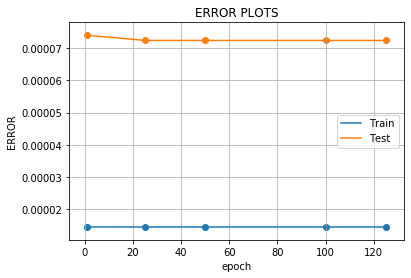

In [54]:
import matplotlib.pyplot as plt
error_train=[]
error_train.append(LOSS_TRAIN[0])
error_train.append(LOSS_TRAIN[24])
error_train.append(LOSS_TRAIN[49])
error_train.append(LOSS_TRAIN[99])
error_train.append(LOSS_TRAIN[124])

error_test=[]
error_test.append(LOSS_TEST[0])
error_test.append(LOSS_TEST[24])
error_test.append(LOSS_TEST[49])
error_test.append(LOSS_TEST[99])
error_test.append(LOSS_TEST[124])


epoch=[1,25,50,100,125]
plt.plot(epoch,error_train, label='Train')
plt.plot(epoch,error_test, label='Test')

plt.scatter(epoch,error_train)
plt.scatter(epoch,error_test)

plt.legend()
plt.xlabel("epoch")
plt.ylabel("ERROR")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()